In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [36]:
# import os
# import pandas as pd
# from tqdm import tqdm
# import librosa
# import numpy as np

# def create_mfcc_dataframe(real_folder_path, fake_folder_path):
#     # Function to extract MFCC features
#     def features_extractor(file):
#         audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
#         mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=100)
#         mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
#         return mfccs_scaled_features

#     # Function to iterate through folder and extract features
#     def iterate_folder_and_extract_features(folder_path, label):
#         extracted_features = []
#         for file_name in tqdm(os.listdir(folder_path)):
#             file_path = os.path.join(folder_path, file_name)
#             if file_path.endswith(".wav"):  # Assuming the audio files are in WAV format
#                 data = features_extractor(file_path)
#                 extracted_features.append([data, label])
#         return extracted_features

#     # Extract features for real audios
#     real_features = iterate_folder_and_extract_features(real_folder_path, label="real")

#     # Extract features for fake audios
#     fake_features = iterate_folder_and_extract_features(fake_folder_path, label="fake")

#     # Combine real and fake features
#     all_features = real_features + fake_features

#     # Create DataFrame
#     df = pd.DataFrame(all_features, columns=["mfcc_features", "label"])

#     return df

In [37]:
# real_folder_path = 'C:/Users/aa/Desktop/generated_audio/generated_audio/data set all/real'
# fake_folder_path = 'C:/Users/aa/Desktop/generated_audio/generated_audio/data set all/fake'

# df = create_mfcc_dataframe(real_folder_path, fake_folder_path)


# df_expanded = pd.DataFrame(df['mfcc_features'].tolist())

# # Combine the expanded MFCC columns with the original DataFrame
# df_expanded = pd.concat([df[['label']], df_expanded], axis=1)


# df_expanded.to_csv("C:\\Users\\aa\\Downloads\\100newneww.csv",index=False)

In [38]:
# df_expanded

In [39]:
data_train = pd.read_csv("..\\data set final\\spliting data\\train part_1.csv")
#data_train_1 = pd.read_csv("..\\data set final\\spliting data\\train part_1.csv")
data_test= pd.read_csv("..\\data set final\\spliting data\\all_test.csv")
data_val= pd.read_csv("..\\data set final\\spliting data\\all_val.csv")

data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = data_test.sample(frac=1).reset_index(drop=True)
data_val = data_val.sample(frac=1).reset_index(drop=True)


In [40]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-298.334167,68.956795,-4.288467,25.858809,-14.420194,-33.003250,-23.437277,1.769600,-10.001314,...,-0.944477,-0.329648,-0.156376,-0.067701,-0.717288,-0.439379,-1.159644,-0.227543,-1.000412,-0.872847
1,fake,-332.915192,81.983971,0.990249,7.206100,-19.941507,-19.003531,-14.590270,-18.349298,-21.341806,...,0.290982,0.452726,-0.229227,-0.197863,-0.518842,0.010355,0.656330,0.803639,-0.189965,-0.591560
2,fake,-324.745911,81.474480,3.620140,19.889847,-20.067314,-16.427361,-16.405910,-17.189400,-17.248894,...,-0.102124,-0.177342,-0.212533,-0.346575,0.084745,-0.301586,-0.707440,0.034582,-0.359778,-0.819590
3,fake,-294.479095,75.299294,-2.181720,9.217306,-19.420443,-20.630905,-22.787998,-13.949958,-18.491341,...,0.155069,0.587983,0.366684,0.462350,0.172494,0.266169,-0.560735,-0.009063,-0.216590,-0.422814
4,fake,-273.808685,78.014053,-9.713357,3.817131,-24.129787,-34.787460,-26.707481,-13.630404,-18.409561,...,0.048186,0.012081,-0.043073,-0.244597,-0.112442,0.004650,-0.657556,-0.142752,-0.417399,-0.178345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,fake,-315.812195,78.090172,-0.673675,16.813370,-25.988626,-18.020792,-18.341331,-21.076529,-16.396040,...,-0.271164,0.310635,-0.177275,-0.128493,0.001113,0.119843,-0.301189,-0.358663,-0.348907,-0.242625
24995,fake,-315.032257,69.893600,-6.039194,-4.252479,-14.986114,-5.555514,-16.861431,-17.564390,-18.390238,...,0.683152,0.280552,0.056332,0.157943,-0.119588,0.083132,-0.435405,0.084640,-0.241981,-0.495205
24996,real,-372.002502,126.170204,-42.664112,41.936790,-20.216314,-6.695371,-14.994272,-22.438530,-5.027732,...,-0.518037,-0.959539,-0.697904,-0.364221,-0.199350,-0.589165,-0.790049,-0.648965,-0.488626,-0.618310
24997,fake,-315.054535,57.904659,20.328707,26.913771,-4.293129,-19.658743,-22.368225,-9.196092,-22.441387,...,0.136474,0.311675,-0.418367,0.449245,0.028362,0.411931,0.058677,0.257129,-0.174571,0.064977


# Encoding

In [41]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-298.334167,68.956795,-4.288467,25.858809,-14.420194,-33.003250,-23.437277,1.769600,-10.001314,...,-0.944477,-0.329648,-0.156376,-0.067701,-0.717288,-0.439379,-1.159644,-0.227543,-1.000412,-0.872847
1,fake,-332.915192,81.983971,0.990249,7.206100,-19.941507,-19.003531,-14.590270,-18.349298,-21.341806,...,0.290982,0.452726,-0.229227,-0.197863,-0.518842,0.010355,0.656330,0.803639,-0.189965,-0.591560
2,fake,-324.745911,81.474480,3.620140,19.889847,-20.067314,-16.427361,-16.405910,-17.189400,-17.248894,...,-0.102124,-0.177342,-0.212533,-0.346575,0.084745,-0.301586,-0.707440,0.034582,-0.359778,-0.819590
3,fake,-294.479095,75.299294,-2.181720,9.217306,-19.420443,-20.630905,-22.787998,-13.949958,-18.491341,...,0.155069,0.587983,0.366684,0.462350,0.172494,0.266169,-0.560735,-0.009063,-0.216590,-0.422814
4,fake,-273.808685,78.014053,-9.713357,3.817131,-24.129787,-34.787460,-26.707481,-13.630404,-18.409561,...,0.048186,0.012081,-0.043073,-0.244597,-0.112442,0.004650,-0.657556,-0.142752,-0.417399,-0.178345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,fake,-315.812195,78.090172,-0.673675,16.813370,-25.988626,-18.020792,-18.341331,-21.076529,-16.396040,...,-0.271164,0.310635,-0.177275,-0.128493,0.001113,0.119843,-0.301189,-0.358663,-0.348907,-0.242625
24995,fake,-315.032257,69.893600,-6.039194,-4.252479,-14.986114,-5.555514,-16.861431,-17.564390,-18.390238,...,0.683152,0.280552,0.056332,0.157943,-0.119588,0.083132,-0.435405,0.084640,-0.241981,-0.495205
24996,real,-372.002502,126.170204,-42.664112,41.936790,-20.216314,-6.695371,-14.994272,-22.438530,-5.027732,...,-0.518037,-0.959539,-0.697904,-0.364221,-0.199350,-0.589165,-0.790049,-0.648965,-0.488626,-0.618310
24997,fake,-315.054535,57.904659,20.328707,26.913771,-4.293129,-19.658743,-22.368225,-9.196092,-22.441387,...,0.136474,0.311675,-0.418367,0.449245,0.028362,0.411931,0.058677,0.257129,-0.174571,0.064977


In [42]:
count = data_train['label'].value_counts()
print(count)


fake    21642
real     3357
Name: label, dtype: int64


In [43]:
# Assuming 'data' is your DataFrame
X_train = data_train.drop(columns='label').values  # Features
y_train = np.array(data_train['label'].values)  # Labels

# # Encode the labels using LabelEncoder (if not already done)
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)
# num_classes = len(label_encoder.classes_)

# # Split the data into training, validation, and test sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_val = data_val.drop(columns='label').values  # Features
y_val = np.array(data_val['label'].values)  # Labels

X_test = data_test.drop(columns='label').values  # Features
y_test = np.array(data_test['label'].values)  # Labels


In [44]:
import pandas as pd
y_train = pd.get_dummies(y_train)
y_val=pd.get_dummies(y_val)
y_test=pd.get_dummies(y_test)

In [45]:
y_train

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
24994,1,0
24995,1,0
24996,0,1
24997,1,0


In [46]:
# ### Train Test Split
# from sklearn.model_selection import train_test_split
# X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True, stratify=y)
# X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42,shuffle=True, stratify=y_temp)

In [47]:
X_train.shape

(24999, 100)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

model.add(Dense(256, activation='relu'))


# Add a fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
782/782 [==============================] - 8s 8ms/step - loss: 0.2711 - accuracy: 0.9027 - val_loss: 0.1583 - val_accuracy: 0.9405
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.1687 - accuracy: 0.9409 - val_loss: 0.1351 - val_accuracy: 0.9476
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.1453 - accuracy: 0.9489 - val_loss: 0.1533 - val_accuracy: 0.9342
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.1169 - accuracy: 0.9584 - val_loss: 0.0945 - val_accuracy: 0.9655
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0986 - accuracy: 0.9649 - val_loss: 0.0835 - val_accuracy: 0.9720
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0843 - accuracy: 0.9698 - val_loss: 0.0899 - val_accuracy: 0.9679
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0744 - accuracy: 0.9734 - val_loss: 0.0801 - val_accuracy: 0.9741
Epoch 

In [49]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 1s - loss: 0.0495 - accuracy: 0.9866 - 1s/epoch - 3ms/step
Test Accuracy: 98.66%


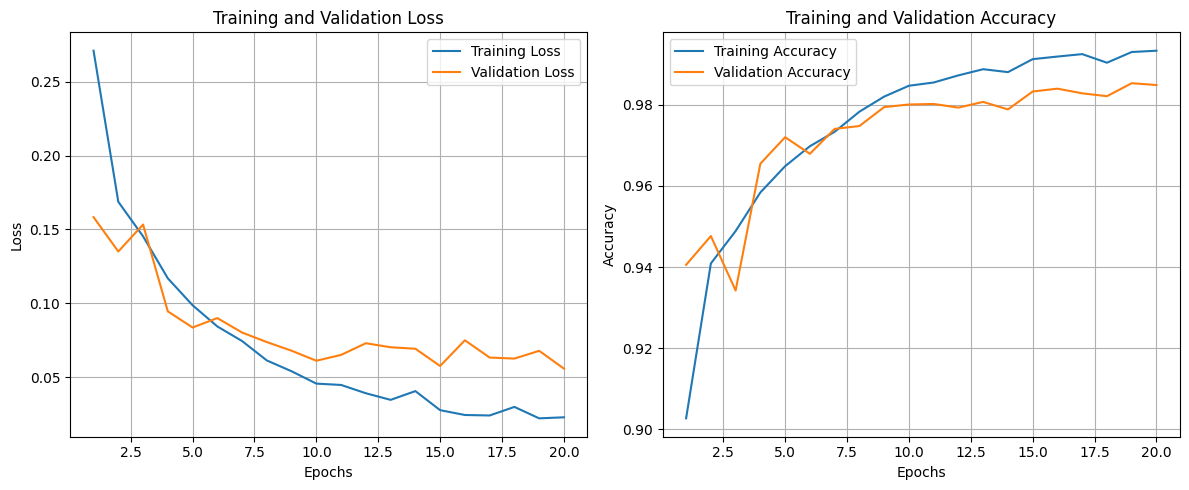

In [50]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [51]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


489/489 [==============================] - 1s 1ms/step


In [52]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
15619,1,0
15620,1,0
15621,1,0
15622,1,0


In [53]:
y_ture=np.argmax(y_test.values, axis=1)


In [54]:
y_ture

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Test f1_score : 94.95%


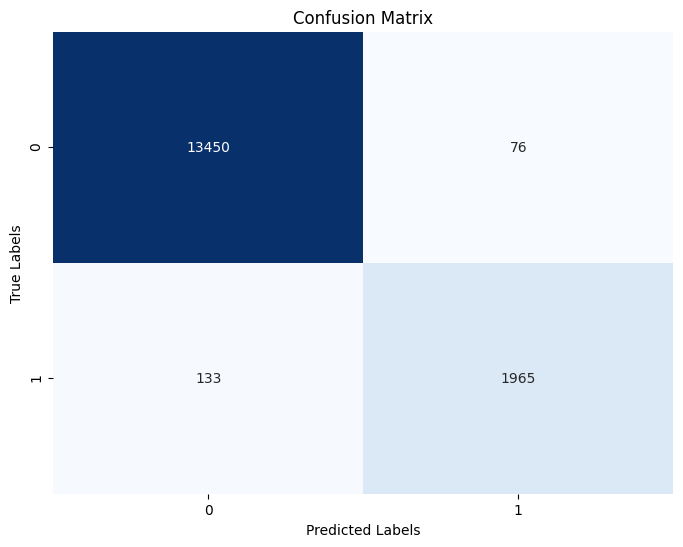

In [55]:


from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [56]:
y_pred_classes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
y_test

,fake,real
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
15619,1,0
15620,1,0
15621,1,0
15622,1,0


# part 2

In [58]:

data_train_2 = pd.read_csv("..\\data set final\\spliting data\\train part_2.csv")
data_train_2 = data_train_2.sample(frac=1).reset_index(drop=True)

data_train=pd.concat([data_train, data_train_2], axis=0)

In [59]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-298.334167,68.956795,-4.288467,25.858809,-14.420194,-33.003250,-23.437277,1.769600,-10.001314,...,-0.944477,-0.329648,-0.156376,-0.067701,-0.717288,-0.439379,-1.159644,-0.227543,-1.000412,-0.872847
1,fake,-332.915192,81.983971,0.990249,7.206100,-19.941507,-19.003531,-14.590270,-18.349298,-21.341806,...,0.290982,0.452726,-0.229227,-0.197863,-0.518842,0.010355,0.656330,0.803639,-0.189965,-0.591560
2,fake,-324.745911,81.474480,3.620140,19.889847,-20.067314,-16.427361,-16.405910,-17.189400,-17.248894,...,-0.102124,-0.177342,-0.212533,-0.346575,0.084745,-0.301586,-0.707440,0.034582,-0.359778,-0.819590
3,fake,-294.479095,75.299294,-2.181720,9.217306,-19.420443,-20.630905,-22.787998,-13.949958,-18.491341,...,0.155069,0.587983,0.366684,0.462350,0.172494,0.266169,-0.560735,-0.009063,-0.216590,-0.422814
4,fake,-273.808685,78.014053,-9.713357,3.817131,-24.129787,-34.787460,-26.707481,-13.630404,-18.409561,...,0.048186,0.012081,-0.043073,-0.244597,-0.112442,0.004650,-0.657556,-0.142752,-0.417399,-0.178345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,fake,-357.463531,89.439476,-4.112441,30.953251,-6.738015,9.775959,-8.600909,2.997091,-19.653553,...,0.329757,0.419278,0.217775,0.697555,0.791217,0.323184,0.516672,0.422900,0.172177,0.194043
24995,fake,-330.142914,69.877960,7.730396,9.333233,-11.746070,-27.321791,-29.185104,-2.302920,-12.410590,...,0.352656,0.583130,-0.219276,-0.470132,-0.436993,-0.314198,0.013171,0.697655,-0.425126,-0.964105
24996,fake,-291.687347,97.304596,7.335000,14.047112,-21.579649,-21.071966,-23.887430,-20.436724,-16.761028,...,-0.749211,-0.617537,-0.324770,-0.771344,-0.712844,-0.121762,-0.331364,-0.746644,-0.724357,-0.352386
24997,fake,-351.094635,72.537155,6.772204,15.898380,-12.591662,-18.999050,-15.169541,-21.824234,-20.115637,...,-0.276468,-0.151023,-0.239131,-0.780692,-0.393120,-0.465490,-0.485682,-0.270464,-0.644411,-0.711999


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics


X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
y_train = pd.get_dummies(y_train)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

model.add(Dense(256, activation='relu'))


# Add a fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2325 - accuracy: 0.9154 - val_loss: 0.1264 - val_accuracy: 0.9525
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1260 - accuracy: 0.9574 - val_loss: 0.0815 - val_accuracy: 0.9692
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0868 - accuracy: 0.9704 - val_loss: 0.0856 - val_accuracy: 0.9708
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0650 - accuracy: 0.9784 - val_loss: 0.0567 - val_accuracy: 0.9807
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0585 - accuracy: 0.9812 - val_loss: 0.0658 - val_accuracy: 0.9779
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0477 - accuracy: 0.9846 - val_loss: 0.0405 - val_accuracy: 0.9860
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0412 - accuracy: 0.9861 - val_loss: 0.0495 - val_ac

In [61]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 1s - loss: 0.0396 - accuracy: 0.9899 - 1s/epoch - 3ms/step
Test Accuracy: 98.99%


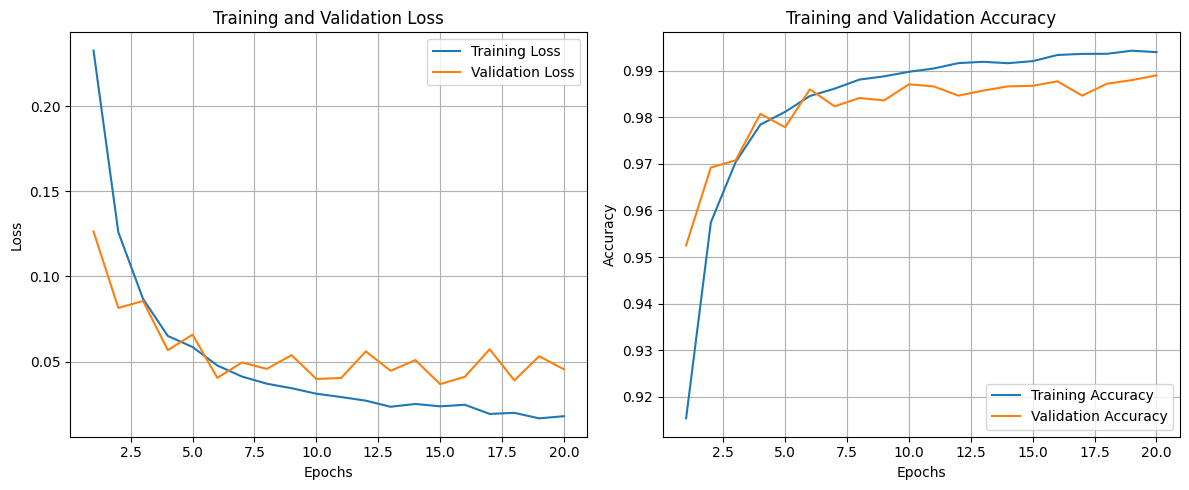

In [62]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


489/489 [==============================] - 1s 2ms/step
Test f1_score : 96.19%


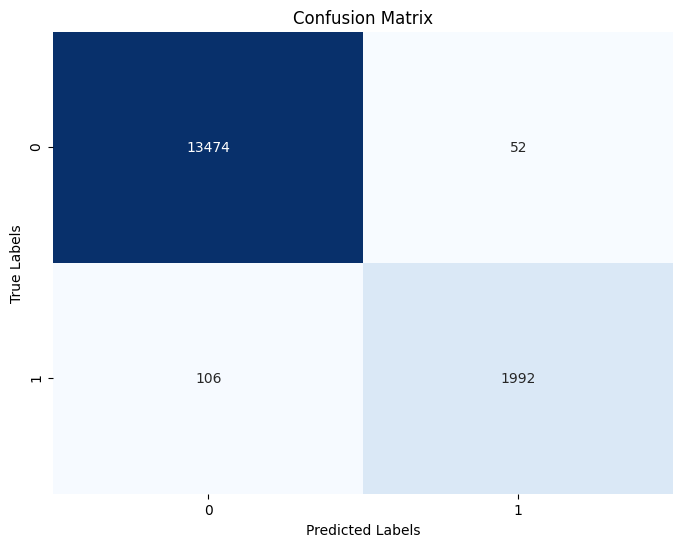

In [63]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 3

In [64]:
data_train_3 = pd.read_csv("..\\data set final\\spliting data\\train part_3.csv")
data_train_3= data_train_3.sample(frac=1).reset_index(drop=True)
data_train=pd.concat([data_train, data_train_3], axis=0)


In [65]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-298.334167,68.956795,-4.288467,25.858809,-14.420194,-33.003250,-23.437277,1.769600,-10.001314,...,-0.944477,-0.329648,-0.156376,-0.067701,-0.717288,-0.439379,-1.159644,-0.227543,-1.000412,-0.872847
1,fake,-332.915192,81.983971,0.990249,7.206100,-19.941507,-19.003531,-14.590270,-18.349298,-21.341806,...,0.290982,0.452726,-0.229227,-0.197863,-0.518842,0.010355,0.656330,0.803639,-0.189965,-0.591560
2,fake,-324.745911,81.474480,3.620140,19.889847,-20.067314,-16.427361,-16.405910,-17.189400,-17.248894,...,-0.102124,-0.177342,-0.212533,-0.346575,0.084745,-0.301586,-0.707440,0.034582,-0.359778,-0.819590
3,fake,-294.479095,75.299294,-2.181720,9.217306,-19.420443,-20.630905,-22.787998,-13.949958,-18.491341,...,0.155069,0.587983,0.366684,0.462350,0.172494,0.266169,-0.560735,-0.009063,-0.216590,-0.422814
4,fake,-273.808685,78.014053,-9.713357,3.817131,-24.129787,-34.787460,-26.707481,-13.630404,-18.409561,...,0.048186,0.012081,-0.043073,-0.244597,-0.112442,0.004650,-0.657556,-0.142752,-0.417399,-0.178345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,fake,-319.655182,60.625118,11.798509,8.110905,-5.454281,-20.856552,-16.744715,-15.877116,-15.190755,...,-0.071665,0.304699,-0.195384,0.392074,0.126276,0.522612,0.376128,0.585934,-0.062587,0.028063
24995,fake,-287.284027,82.256523,-7.275355,9.094277,-27.823099,-13.342501,-21.594271,-21.240589,-20.496742,...,0.102324,0.092391,-0.013957,-0.384198,0.364309,0.075961,-0.188099,-0.016230,-0.695205,-0.554117
24996,fake,-380.019043,88.695023,12.346443,26.885841,-9.717121,-24.833256,-15.436979,-9.257849,-23.601698,...,-0.263339,-0.536612,-0.476956,0.268690,-0.165127,-0.145435,-0.496452,-0.764482,-1.263005,-0.360591
24997,fake,-299.056854,78.112556,4.029307,15.955218,-16.673708,-9.847815,-18.717539,-21.392317,-27.144146,...,-0.309139,-0.138794,-0.306644,-0.198174,-0.016002,0.005902,-0.714999,-0.659681,-1.052771,-0.591918


In [66]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
y_train = pd.get_dummies(y_train)


X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# Train the model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

model.add(Dense(256, activation='relu'))


# Add a fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
2344/2344 [==============================] - 16s 7ms/step - loss: 0.2025 - accuracy: 0.9289 - val_loss: 0.1165 - val_accuracy: 0.9598
Epoch 2/20
2344/2344 [==============================] - 16s 7ms/step - loss: 0.1047 - accuracy: 0.9648 - val_loss: 0.0636 - val_accuracy: 0.9775
Epoch 3/20
2344/2344 [==============================] - 15s 7ms/step - loss: 0.0694 - accuracy: 0.9763 - val_loss: 0.0475 - val_accuracy: 0.9828
Epoch 4/20
2344/2344 [==============================] - 16s 7ms/step - loss: 0.0540 - accuracy: 0.9815 - val_loss: 0.0475 - val_accuracy: 0.9829
Epoch 5/20
2344/2344 [==============================] - 16s 7ms/step - loss: 0.0477 - accuracy: 0.9839 - val_loss: 0.0414 - val_accuracy: 0.9868
Epoch 6/20
2344/2344 [==============================] - 15s 7ms/step - loss: 0.0405 - accuracy: 0.9867 - val_loss: 0.0460 - val_accuracy: 0.9846
Epoch 7/20
2344/2344 [==============================] - 16s 7ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.0361 - val_ac

In [67]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 1s - loss: 0.0348 - accuracy: 0.9916 - 1s/epoch - 3ms/step
Test Accuracy: 99.16%


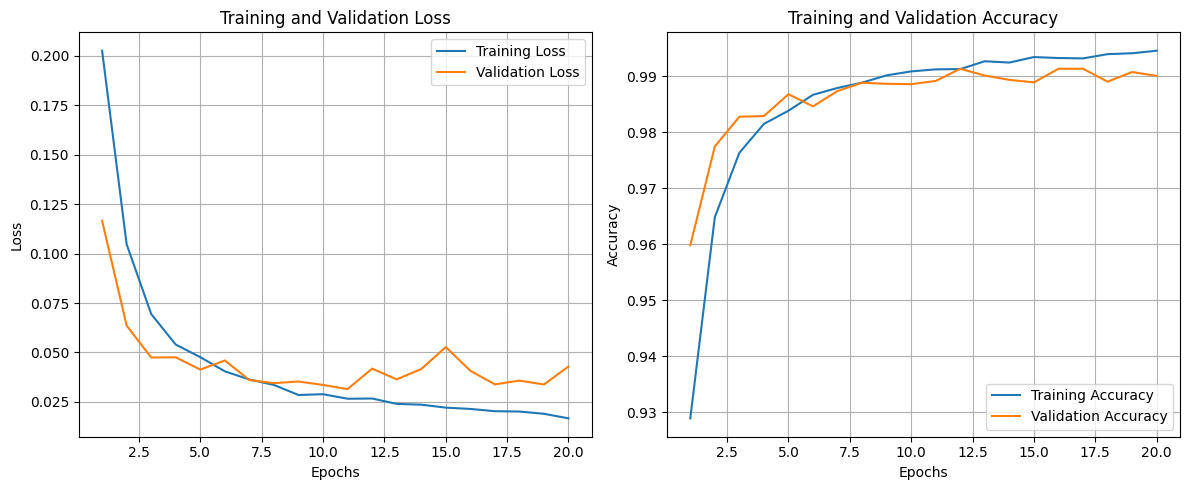

In [68]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


489/489 [==============================] - 1s 1ms/step
Test f1_score : 96.84%


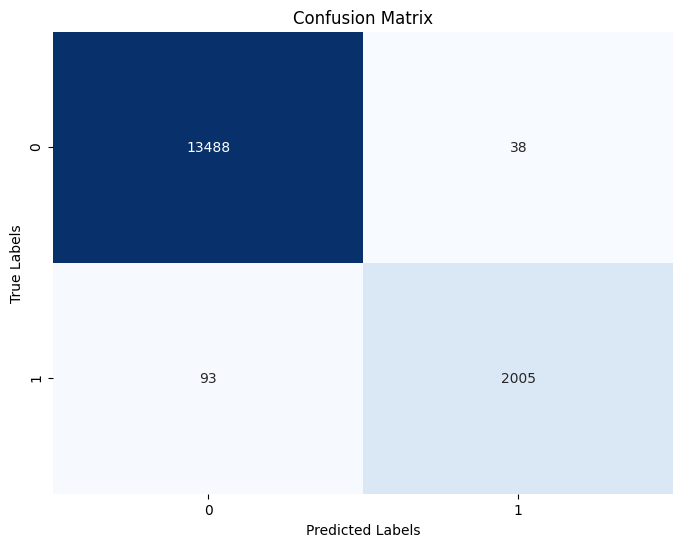

In [69]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 4

In [70]:
data_train_4 = pd.read_csv("..\\data set final\\spliting data\\train part_4.csv")
data_train_4= data_train_4.sample(frac=1).reset_index(drop=True)
data_train=pd.concat([data_train, data_train_4], axis=0)

#data_train['label']=label_encoder.transform(data_train['label'])

In [71]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-298.334167,68.956795,-4.288467,25.858809,-14.420194,-33.003250,-23.437277,1.769600,-10.001314,...,-0.944477,-0.329648,-0.156376,-0.067701,-0.717288,-0.439379,-1.159644,-0.227543,-1.000412,-0.872847
1,fake,-332.915192,81.983971,0.990249,7.206100,-19.941507,-19.003531,-14.590270,-18.349298,-21.341806,...,0.290982,0.452726,-0.229227,-0.197863,-0.518842,0.010355,0.656330,0.803639,-0.189965,-0.591560
2,fake,-324.745911,81.474480,3.620140,19.889847,-20.067314,-16.427361,-16.405910,-17.189400,-17.248894,...,-0.102124,-0.177342,-0.212533,-0.346575,0.084745,-0.301586,-0.707440,0.034582,-0.359778,-0.819590
3,fake,-294.479095,75.299294,-2.181720,9.217306,-19.420443,-20.630905,-22.787998,-13.949958,-18.491341,...,0.155069,0.587983,0.366684,0.462350,0.172494,0.266169,-0.560735,-0.009063,-0.216590,-0.422814
4,fake,-273.808685,78.014053,-9.713357,3.817131,-24.129787,-34.787460,-26.707481,-13.630404,-18.409561,...,0.048186,0.012081,-0.043073,-0.244597,-0.112442,0.004650,-0.657556,-0.142752,-0.417399,-0.178345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,fake,-338.063293,106.578743,-1.573530,6.365352,-16.178881,-18.739943,-18.774746,-23.794102,-21.021465,...,0.713723,0.121187,0.180945,0.540367,0.678885,0.446313,-0.042709,-0.048049,-0.266228,-0.145454
24995,fake,-326.964905,68.532578,2.623583,22.053017,-15.237925,-16.508793,-21.847963,-26.795347,-16.042255,...,0.431971,0.223590,-0.164985,-0.266646,-0.980979,0.070457,0.238099,0.538647,-0.241647,-0.965308
24996,real,-175.982300,135.372665,-76.400726,18.241343,-36.602516,-14.105903,-20.023743,-4.344286,-7.823996,...,-0.561607,0.168533,-0.220295,-0.346976,-0.451076,-0.839784,-0.675706,-0.308666,-0.509533,-0.591451
24997,fake,-278.932983,68.423866,5.457043,19.410816,-13.822695,-28.230022,-27.078583,-19.196486,-12.467177,...,-0.250022,0.055760,-0.448306,-0.287707,0.072199,0.135757,-0.480141,-0.192785,-0.629061,-0.366987


In [72]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

y_train = pd.get_dummies(y_train)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

model.add(Dense(256, activation='relu'))


# Add a fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
3125/3125 [==============================] - 21s 7ms/step - loss: 0.1799 - accuracy: 0.9368 - val_loss: 0.0879 - val_accuracy: 0.9692
Epoch 2/20
3125/3125 [==============================] - 20s 6ms/step - loss: 0.0845 - accuracy: 0.9715 - val_loss: 0.0536 - val_accuracy: 0.9811
Epoch 3/20
3125/3125 [==============================] - 20s 6ms/step - loss: 0.0581 - accuracy: 0.9812 - val_loss: 0.0439 - val_accuracy: 0.9858
Epoch 4/20
3125/3125 [==============================] - 20s 6ms/step - loss: 0.0455 - accuracy: 0.9853 - val_loss: 0.0397 - val_accuracy: 0.9853
Epoch 5/20
3125/3125 [==============================] - 21s 7ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 6/20
3125/3125 [==============================] - 21s 7ms/step - loss: 0.0334 - accuracy: 0.9889 - val_loss: 0.0415 - val_accuracy: 0.9849
Epoch 7/20
3125/3125 [==============================] - 21s 7ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0355 - val_ac

In [73]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 1s - loss: 0.0447 - accuracy: 0.9923 - 1s/epoch - 3ms/step
Test Accuracy: 99.23%


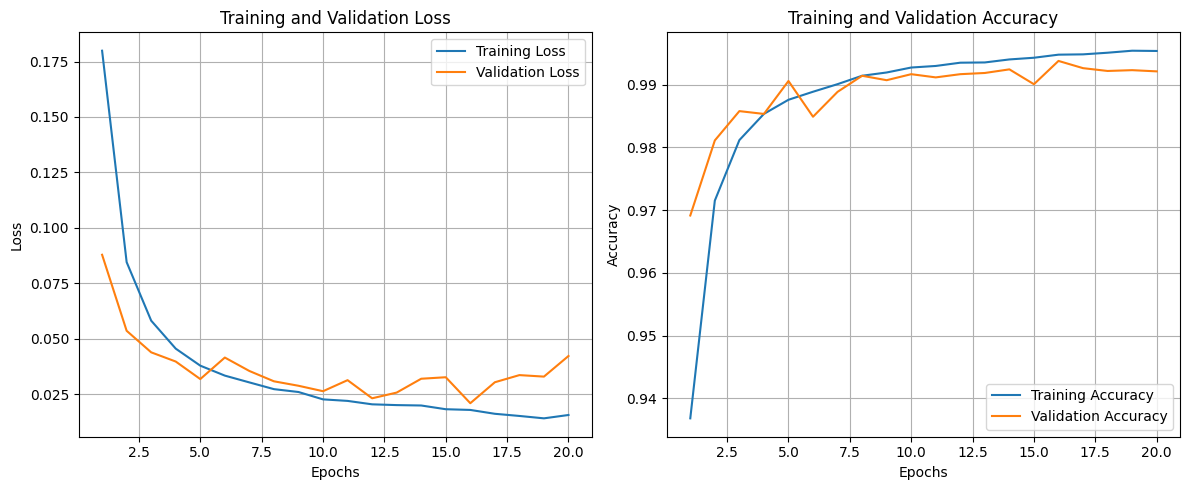

In [74]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


489/489 [==============================] - 1s 1ms/step
Test f1_score : 97.09%


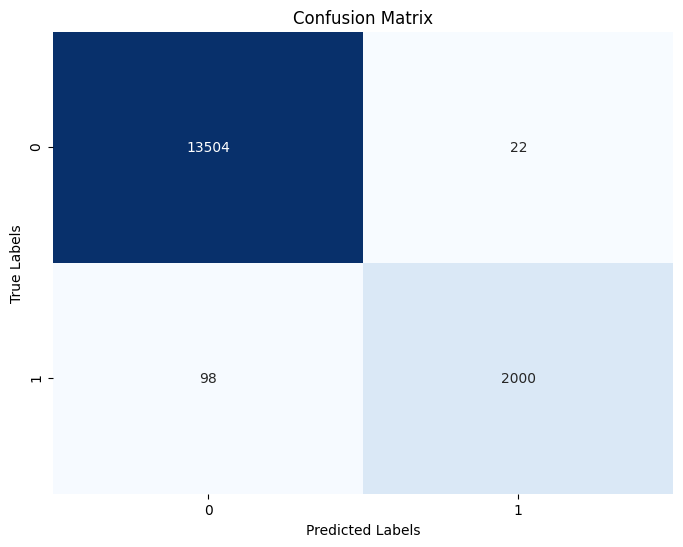

In [75]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# part 5

In [76]:
data_train_5 = pd.read_csv("..\\data set final\\spliting data\\train part_5.csv")
data_train_5= data_train_5.sample(frac=1).reset_index(drop=True)
#data_train['label']=label_encoder.transform(data_train['label'])
data_train=pd.concat([data_train, data_train_5], axis=0)

In [77]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,fake,-298.334167,68.956795,-4.288467,25.858809,-14.420194,-33.003250,-23.437277,1.769600,-10.001314,...,-0.944477,-0.329648,-0.156376,-0.067701,-0.717288,-0.439379,-1.159644,-0.227543,-1.000412,-0.872847
1,fake,-332.915192,81.983971,0.990249,7.206100,-19.941507,-19.003531,-14.590270,-18.349298,-21.341806,...,0.290982,0.452726,-0.229227,-0.197863,-0.518842,0.010355,0.656330,0.803639,-0.189965,-0.591560
2,fake,-324.745911,81.474480,3.620140,19.889847,-20.067314,-16.427361,-16.405910,-17.189400,-17.248894,...,-0.102124,-0.177342,-0.212533,-0.346575,0.084745,-0.301586,-0.707440,0.034582,-0.359778,-0.819590
3,fake,-294.479095,75.299294,-2.181720,9.217306,-19.420443,-20.630905,-22.787998,-13.949958,-18.491341,...,0.155069,0.587983,0.366684,0.462350,0.172494,0.266169,-0.560735,-0.009063,-0.216590,-0.422814
4,fake,-273.808685,78.014053,-9.713357,3.817131,-24.129787,-34.787460,-26.707481,-13.630404,-18.409561,...,0.048186,0.012081,-0.043073,-0.244597,-0.112442,0.004650,-0.657556,-0.142752,-0.417399,-0.178345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,fake,-303.495819,84.817062,-12.001532,14.688151,-14.110024,-28.314224,-15.111705,-8.943960,-12.751413,...,-0.095119,0.380766,0.152903,0.728659,-0.008990,-0.097526,-0.060424,0.079851,-0.493868,0.147978
24996,fake,-323.723358,75.614326,-4.231524,29.633471,-16.004683,-23.121929,-18.451151,-24.524761,-15.393674,...,-0.035516,0.452724,0.148741,-0.237933,-0.696657,-0.177682,0.348507,1.096918,0.056469,-0.983879
24997,fake,-315.037537,86.090698,-2.028826,13.628697,-14.823245,-21.729496,-22.313574,-15.520288,-15.908395,...,0.450980,-0.026319,-0.245696,0.421992,0.305506,0.218237,0.013155,0.135891,-0.207673,-0.357726
24998,fake,-302.057648,78.793404,2.546606,21.766241,-16.290344,-22.058517,-17.685858,-16.929180,-12.428852,...,0.144678,0.182692,-0.014353,0.240367,0.191586,0.452480,0.116457,-0.097410,-0.180855,0.158984


In [78]:
X_train = data_train.drop(columns='label').values  # Features
y_train = data_train['label'].values  # Labels
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = pd.get_dummies(y_train)
# Train the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
model.add(Flatten())

model.add(Dense(256, activation='relu'))


# Add a fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))


# Add the output layer with softmax activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
3907/3907 [==============================] - 26s 7ms/step - loss: 0.1636 - accuracy: 0.9430 - val_loss: 0.0774 - val_accuracy: 0.9725
Epoch 2/20
3907/3907 [==============================] - 26s 7ms/step - loss: 0.0723 - accuracy: 0.9762 - val_loss: 0.0425 - val_accuracy: 0.9853
Epoch 3/20
3907/3907 [==============================] - 26s 7ms/step - loss: 0.0499 - accuracy: 0.9840 - val_loss: 0.0411 - val_accuracy: 0.9860
Epoch 4/20
3907/3907 [==============================] - 26s 7ms/step - loss: 0.0421 - accuracy: 0.9869 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 5/20
3907/3907 [==============================] - 25s 7ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0340 - val_accuracy: 0.9902
Epoch 6/20
3907/3907 [==============================] - 26s 7ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0343 - val_accuracy: 0.9882
Epoch 7/20
3907/3907 [==============================] - 25s 6ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0273 - val_ac

In [79]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

489/489 - 1s - loss: 0.0273 - accuracy: 0.9944 - 1s/epoch - 3ms/step
Test Accuracy: 99.44%


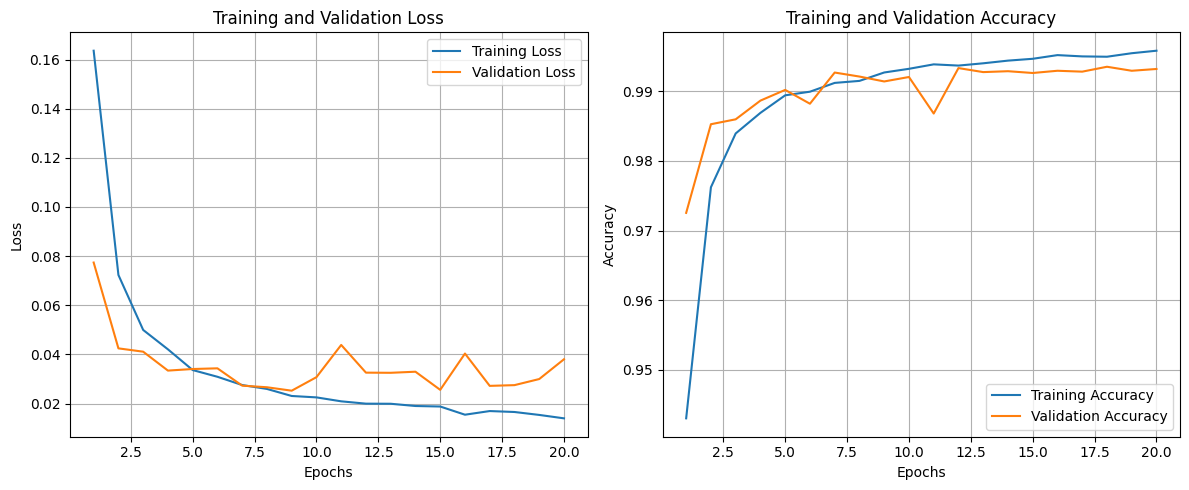

In [80]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


489/489 [==============================] - 1s 2ms/step
Test f1_score : 97.91%


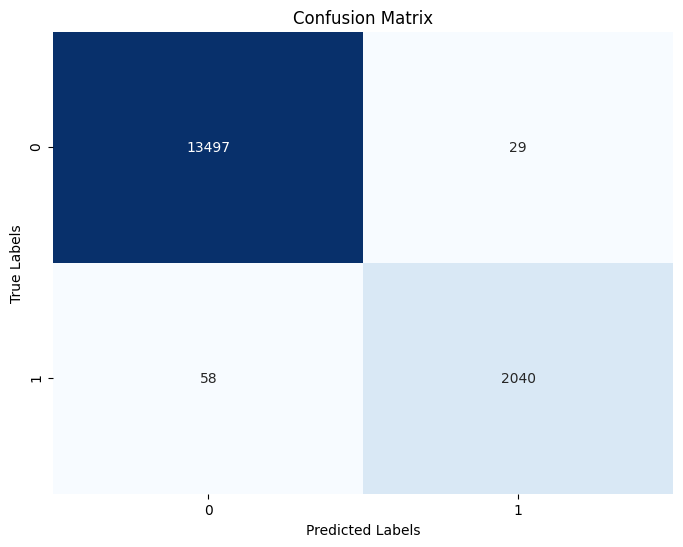

In [81]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score 

from sklearn.metrics import f1_score
f1=f1_score(y_ture, y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(y_ture, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#################################################################

In [82]:
import joblib


In [83]:
joblib.dump(model, 'ljspeech_full_band_melgan.pkl')

INFO:tensorflow:Assets written to: ram://590abf45-532b-4746-9a81-8bb26c4cfe2e/assets


INFO:tensorflow:Assets written to: ram://590abf45-532b-4746-9a81-8bb26c4cfe2e/assets


['ljspeech_full_band_melgan.pkl']

In [84]:
#build the model
model.save('ljspeech_full_band_melgan.h5')
#to call the model
#New_Model = tf.keras.models.load_model('my_model.h5')